In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

Reading the Stock Data

In [2]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-24,27.250000,27.250000,26.987499,27.007500,24.724873,54281600
1,2015-12-28,26.897499,26.922501,26.545000,26.705000,24.447937,106816800
2,2015-12-29,26.740000,27.357500,26.715000,27.184999,24.887365,123724800
3,2015-12-30,27.145000,27.174999,26.795000,26.830000,24.562372,100855200
4,2015-12-31,26.752501,26.757500,26.205000,26.315001,24.090902,163649200


general information on all the features of the apple stock dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1763 non-null   object 
 1   Open       1763 non-null   float64
 2   High       1763 non-null   float64
 3   Low        1763 non-null   float64
 4   Close      1763 non-null   float64
 5   Adj Close  1763 non-null   float64
 6   Volume     1763 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


Statistical values of the data

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03
mean,78.876703,79.790386,77.997810,78.930529,77.440199,1.210252e+08
std,49.371926,50.031090,48.707248,49.389140,49.828028,5.748932e+07
min,22.500000,22.917500,22.367500,22.584999,20.914917,3.519590e+07
25%,39.080000,39.401251,38.717500,39.039999,37.096766,8.352340e+07
50%,53.662498,54.297501,53.127499,53.759998,51.879818,1.055755e+08
75%,129.194999,130.944999,128.004997,129.725006,128.452080,1.407922e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,5.334788e+08


Converting the date object into a Date datatype

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1763 non-null   datetime64[ns]
 1   Open       1763 non-null   float64       
 2   High       1763 non-null   float64       
 3   Low        1763 non-null   float64       
 4   Close      1763 non-null   float64       
 5   Adj Close  1763 non-null   float64       
 6   Volume     1763 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.5 KB


Maximum and Minimum Close price for Apple's Stock from 24/12/2015 to 23/12/2022

In [6]:
#Now lets find out the max and min Close price for apples stock throughout the time period
maxim = df["Close"].max()
minim = df["Close"].min()
print(f"{maxim} {minim}")

182.009995 22.584999


Heatmap showing high positive correlation between all the attributes

<AxesSubplot: >

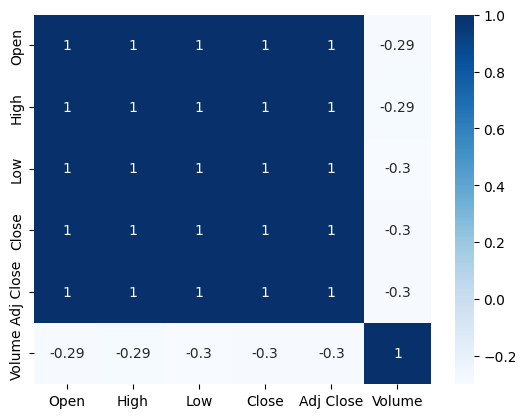

In [7]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Calculating the difference between prices at different times

In [8]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2015-12-24,27.250000,27.250000,26.987499,27.007500,24.724873,54281600,0.000000,0.262501,-0.242500,0.020001,0.262501,0.242500
1,2015-12-28,26.897499,26.922501,26.545000,26.705000,24.447937,106816800,-0.025002,0.352499,-0.217501,0.160000,0.377501,0.192499
2,2015-12-29,26.740000,27.357500,26.715000,27.184999,24.887365,123724800,-0.617500,0.025000,-0.172501,0.469999,0.642500,-0.444999
3,2015-12-30,27.145000,27.174999,26.795000,26.830000,24.562372,100855200,-0.029999,0.350000,-0.344999,0.035000,0.379999,0.315000
4,2015-12-31,26.752501,26.757500,26.205000,26.315001,24.090902,163649200,-0.004999,0.547501,-0.442499,0.110001,0.552500,0.437500


Creating a seperate heatmap to show the correlation between all the above calculated variables

<AxesSubplot: >

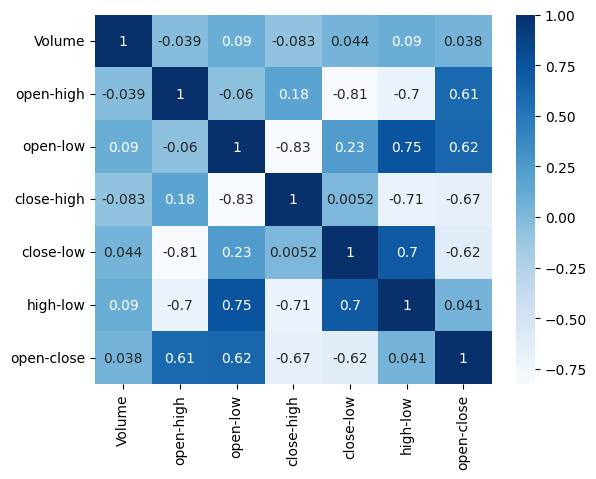

In [9]:
df_new = df.copy()
df_new.drop(["Open", "Close", "High", "Low", "Adj Close"], axis=1, inplace=True)
sns.heatmap(df_new.corr(), cmap="Blues", annot=True)



Data Cleaning Procedure to achieve the following tasks
1) Identify the missing dates and add them to the dataframe
2) Find the stock prices of those missing dates via interpolate method 
3) Sorting the entire dataframe based on dates to be easily usable for visualisation and prediction

In [10]:

df.drop(['open-high', 'open-low', 'close-high', 'close-low', 'high-low','open-close'], axis=1, inplace=True)


missing = pd.to_datetime(pd.date_range(start="2015-12-24", end="2022-12-23").difference(df["Date"]), "%Y-%m-%d")



dic = {"Date" : [], "Open" : [], "High" : [], "Low":[], "Close":[], "Adj Close" : [], "Volume" : []}
for dates in missing:
  dic["Date"].append(dates)
  dic["Open"].append(np.nan)
  dic["High"].append(np.nan)
  dic["Low"].append(np.nan)
  dic["Adj Close"].append(np.nan)
  dic["Volume"].append(np.nan)
  dic["Close"].append(np.nan)



dic = pd.DataFrame(dic)
df =  pd.concat([df, dic], ignore_index=True)

df.sort_values(by="Date", ascending=True, inplace=True)
df.set_index("Date", inplace=True)




  

Interpolating and showing the generic details of the stocks Dataset

In [11]:
#Handling missing values
final_df = df.interpolate(option='spline')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2015-12-24 to 2022-12-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2557 non-null   float64
 1   High       2557 non-null   float64
 2   Low        2557 non-null   float64
 3   Close      2557 non-null   float64
 4   Adj Close  2557 non-null   float64
 5   Volume     2557 non-null   float64
dtypes: float64(6)
memory usage: 139.8 KB


Showing the stock prices based on the user intrested dates

In [12]:
pd.options.display.float_format = '{:.2f}'.format
day = input("Enter the day number: ")
month = input("Enter the month number : ")
year = input("Enter the year: ")
date = f"{year}-{month}-{day}"

date_object = datetime.strptime(date, '%Y-%m-%d')
final_df.loc[date_object]

Open              142.77
High              146.20
Low               138.80
Close             142.56
Adj Close         142.13
Volume      182602000.00
Name: 2022-05-12 00:00:00, dtype: float64

Graph between all the dates and the closing price

Text(0.5, 1.0, 'Apple Stocks')

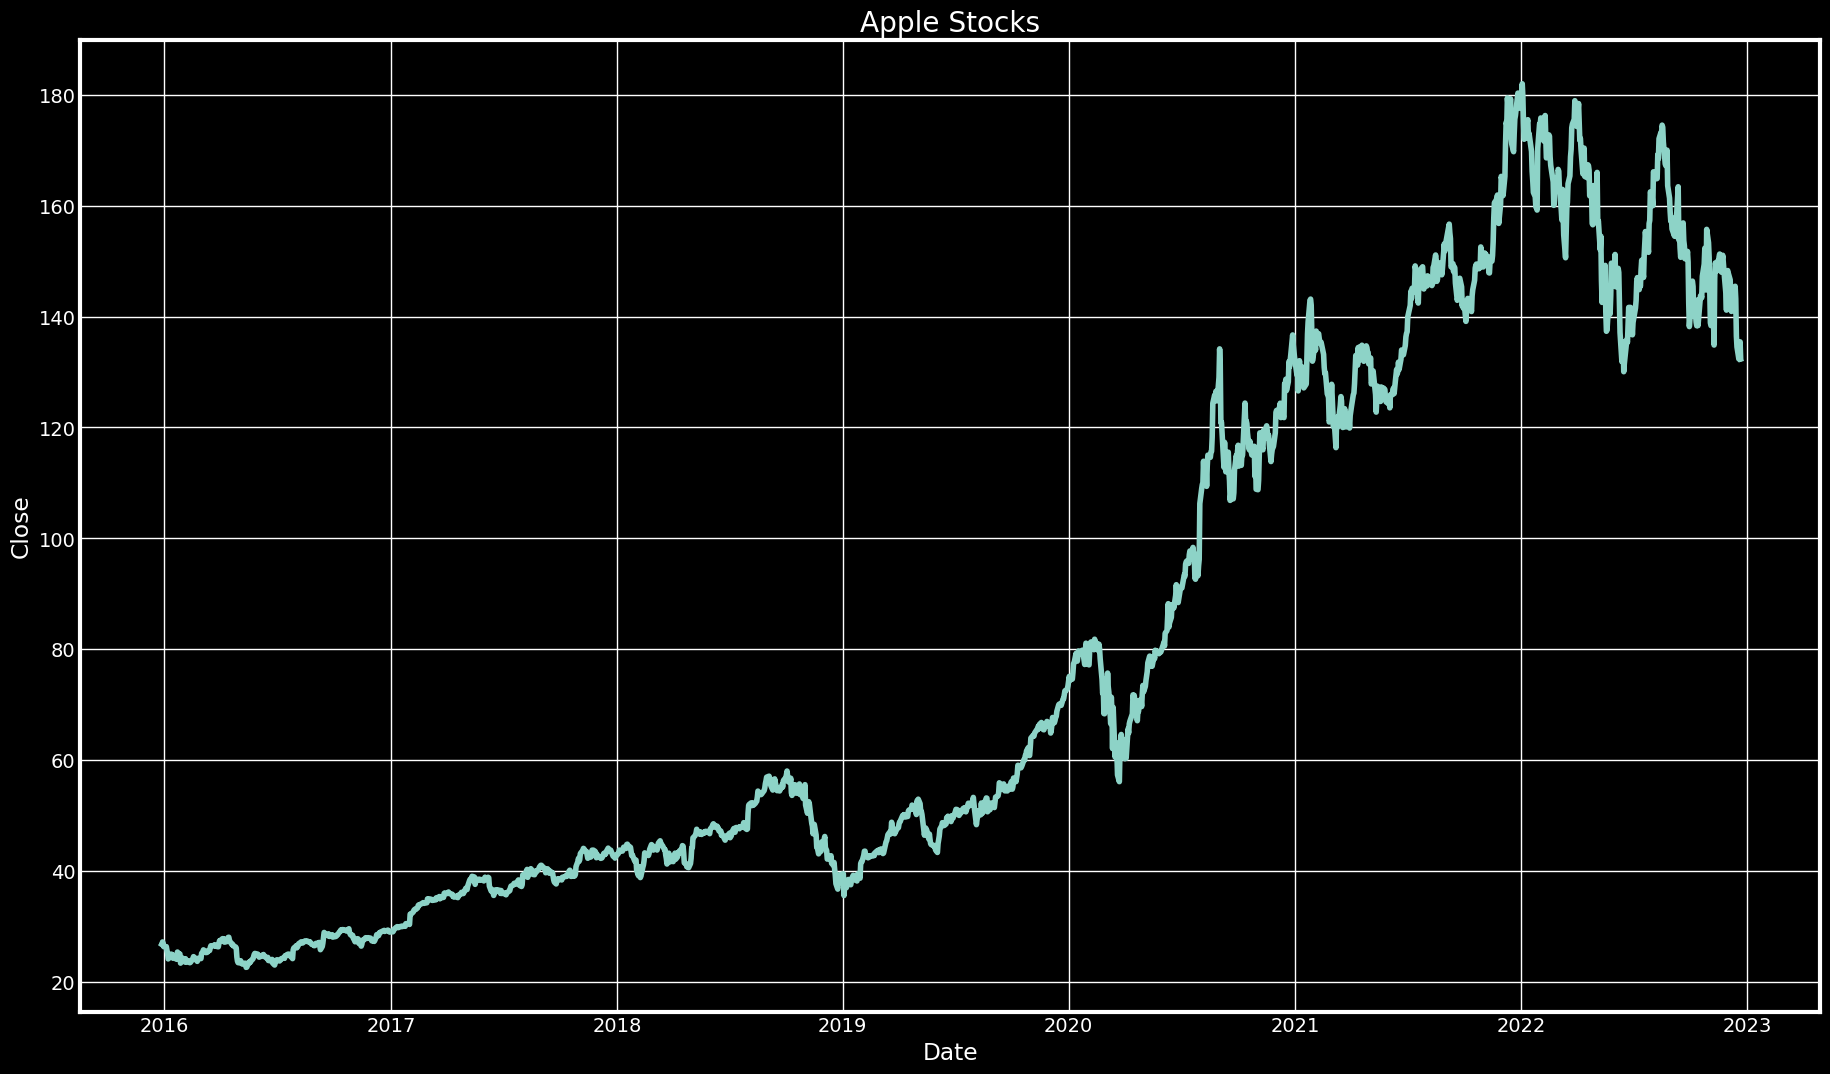

In [13]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

final_df.reset_index()

plt.figure(figsize=(20,12))
plt.plot(final_df.index,final_df['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stocks")




Graph between all the Dates and the volume stock's sold

Text(0.5, 1.0, 'Apple Stocks')

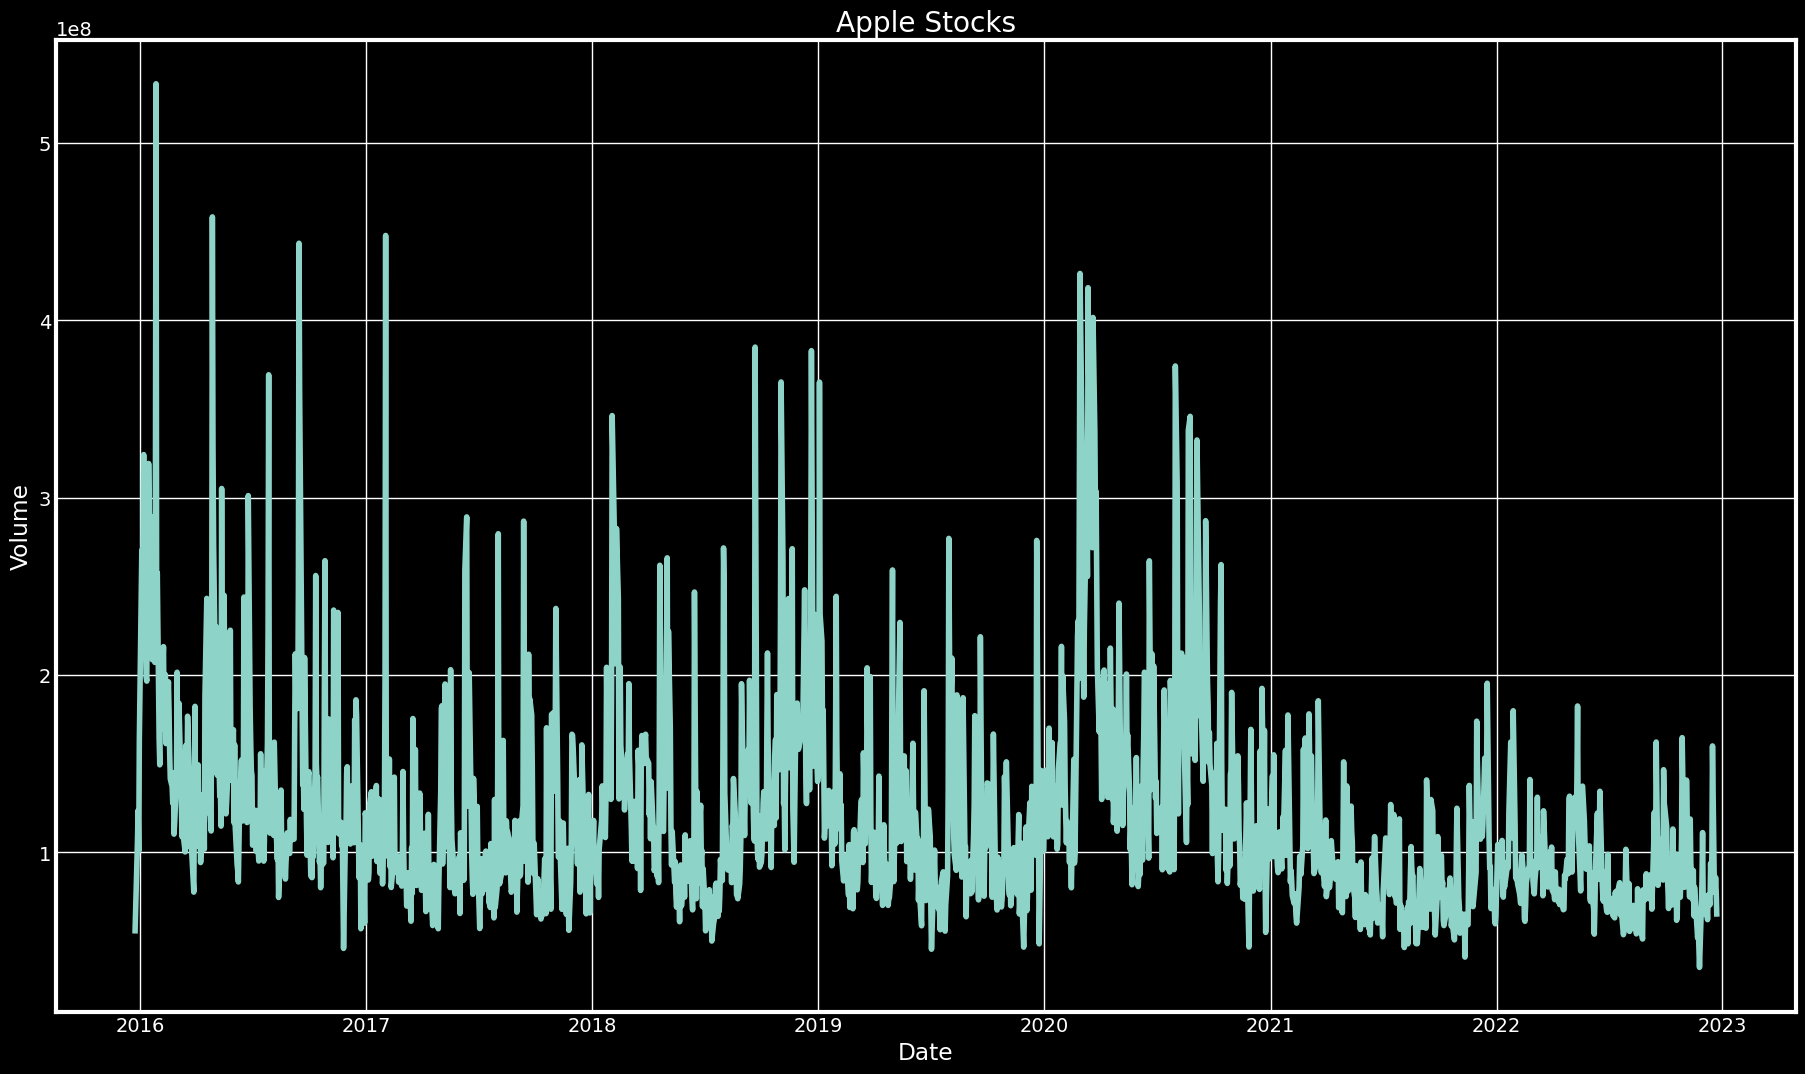

In [14]:

plt.figure(figsize=(20,12))
plt.plot(final_df.index,final_df['Volume'])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Apple Stocks")


In [15]:
fig1 = px.line(final_df, x = df.index, y = "Volume", title="Apple", template="plotly_dark")
fig2 = px.line(final_df, x = df.index, y = "Close", title="Apple", template="plotly_dark")
fig3 = px.line(final_df, x = df.index, y = "Open", title="Apple", template="plotly_dark")
fig4 = px.line(final_df, x = df.index, y = "High", title="Apple", template="plotly_dark")
fig5 = px.line(final_df, x = df.index, y = "Low", title="Apple", template="plotly_dark")

fig = go.Figure(data=fig1.data + fig2.data + fig3.data + fig4.data + fig5.data)

fig.show()

Advanced Graph between Dates and Closing Price

In [16]:
fig = px.line(final_df, x = df.index, y = "Close", title="Apple", template="plotly_dark")
fig.show()

Graphs to show variation of all the prices with common dates using Plotly

In [17]:
fig = make_subplots(rows = 5, cols = 1, subplot_titles = ("Volume","High","Low","Open", "Close"), shared_xaxes=True)


#Adding the traces
fig.add_trace(
    go.Scatter(x = df.index, y = df["Volume"],name = "Volume"),
    row = 1, col = 1
    
)

fig.add_trace(
    go.Scatter(x = df.index, y = df["High"] , name = "High"),
    row = 2, col = 1
)

fig.add_trace(
    go.Scatter(x = df.index, y = df["Low"],  name = "Low"),
    row = 3, col = 1
)

fig.add_trace(
    go.Scatter(x = df.index, y = df["Open"],  name = "Open"),
    row = 4, col = 1
)

fig.add_trace(
    go.Scatter(x = df.index, y = df["Close"],  name = "Close"),
    row = 5, col = 1
)


#Updating the xaxes properties 

fig.update_xaxes(title_text = "Dates", row = 1, col = 1)
fig.update_xaxes(title_text = "Dates", row = 2, col = 1)
fig.update_xaxes(title_text = "Dates", row = 3, col = 1)
fig.update_xaxes(title_text = "Dates", row = 4, col = 1)
fig.update_xaxes(title_text = "Dates", row = 5, col = 1)

#Updating the yaxes properties 

fig.update_yaxes(title_text = "Volume", row = 1, col = 1)
fig.update_yaxes(title_text = "High", row = 2, col = 1)
fig.update_yaxes(title_text = "Low", row = 3, col = 1)
fig.update_yaxes(title_text = "Open", row = 4, col = 1)
fig.update_yaxes(title_text = "Close", row = 5, col = 1)




fig.update_layout(height = 2000, width = 1000, title="Apple Stocks Data Over Time", template="plotly_dark")
fig.show()

Analyse Daily Price Change in Apple Stocks

In [18]:
final_df["Percentage Change"] = ((final_df["Close"] - final_df["Open"])/ final_df["Close"])*100
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,Percentage Change
Date,,,,,,,
2015-12-24,27.25,27.25,26.99,27.01,24.72,54281600.00,-0.90
2015-12-25,27.16,27.17,26.88,26.93,24.66,67415400.00,-0.85
2015-12-26,27.07,27.09,26.77,26.86,24.59,80549200.00,-0.81
2015-12-27,26.99,27.00,26.66,26.78,24.52,93683000.00,-0.77
2015-12-28,26.90,26.92,26.55,26.70,24.45,106816800.00,-0.72


Graph to show percentage change over time using Plotly

In [19]:
fig = px.line(final_df, x = final_df.index, y = "Percentage Change", title = "Percentage Change over Time", template="plotly_dark")
fig.show()

Percentage change in Apple Stocks in the last month 
(23/11/2022 : 23/12/2022)

In [20]:
fig = px.line(final_df, x = final_df["23-11-2022":"23-12-2022"].index,
                        y = final_df["23-11-2022":"23-12-2022"]["Percentage Change"], title="Percentage Change over the last month", 
                        template="plotly_dark")

fig.update_xaxes(title_text="Dates", row = 1, col = 1)
fig.update_yaxes(title_text="Percentage Change", row = 1, col = 1)

fig.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:4089: UserWarning:

Parsing '23-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:4089: UserWarning:

Parsing '23-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:6407: UserWarning:

Parsing '23-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:6407: UserWarning:

Parsing '23-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



Fitting Various Machine Learning Models To predict the Closing Price

In [21]:
#importing various machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

Splitting the entire dataset into Train and Test and selecting the required features

In [22]:
train = final_df[:2000]
test = final_df[2000:]

X_train = train[["Open", "High", "Low"]]
X_test = test[["Open", "High", "Low"]]

y_train = train["Close"]
y_test = test["Close"]

Stock Market Prediction using K Nearest Neighbour Regressor

In [23]:
param_grid = {"n_neighbors" : [1,10,100,1000], 
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_grid, cv=10)
grid = grid.fit(X_train, y_train)

knn = KNeighborsRegressor(n_neighbors=1000, p=1, weights="uniform")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error1 = mean_absolute_error(y_test, y_pred)
error2 = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error {error1}\n Mean Squared Error {error2}")


Mean Absolute Error 72.59296248406883
 Mean Squared Error 5424.433587053147


Stock Market Prediction using Support Vector Regressor

In [24]:
svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

error1 = mean_absolute_error(y_test, y_pred)
error2 = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error {error1}\n Mean Squared Error {error2}")

Mean Absolute Error 38.0109068964378
 Mean Squared Error 2128.811465103274


Stock Market Prediction using Decision Tree Regressor

In [25]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

error1 = mean_absolute_error(y_test, y_pred)
error2 = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error {error1}\n Mean Squared Error {error2}")

Mean Absolute Error 11.897786067773797
 Mean Squared Error 259.78979982663384


Stock Market Prediction using Random Forrest Regressor

In [26]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

error1 = mean_absolute_error(y_test, y_pred)
error2 = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error {error1}\n Mean Squared Error {error2}")


Mean Absolute Error 12.215850309244551
 Mean Squared Error 270.3723944553422


Predicting the future stocks using the above mentioned models